In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
paperData = pd.read_csv("DataForMLPaper.csv")

In [3]:
paperData.head()

,Department,ColorPages,GrayscalePages,TotalPrintedPages,CostInk,CostPaper,CostTotal,Jobs,Month
0,[No department],"2,742.00","605,447.00","608,189.00","30,683.65","9,122.84","39,806.49","11,355.00",11
1,Administrator,18.00,297.00,315.00,17.55,4.73,22.28,70.00,11
2,Arts,0.00,NaN,0.00,0.00,0.00,0.00,NaN,11
3,Business/Technology,0.00,"3,465.00","3,465.00",173.25,51.98,225.23,44.00,11
4,CST,NaN,NaN,0.00,0.00,0.00,0.00,NaN,11


In [4]:
paperData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Department         323 non-null    object
 1   ColorPages         298 non-null    object
 2   GrayscalePages     298 non-null    object
 3   TotalPrintedPages  323 non-null    object
 4   CostInk            323 non-null    object
 5   CostPaper          323 non-null    object
 6   CostTotal          323 non-null    object
 7   Jobs               298 non-null    object
 8   Month              323 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 22.8+ KB


In [5]:
paperData['Department'] = pd.Categorical(paperData['Department '])

In [6]:
paperData['TotalPrintedPages'] = paperData['TotalPrintedPages'].str.replace(',', '').astype(float)
paperData['Jobs'] = paperData['Jobs'].str.replace(',', '').astype(float)

In [7]:
paperData.drop("Department ", inplace=True, axis=1)

In [8]:
paperData.dropna(inplace=True)

In [9]:
paperData

,ColorPages,GrayscalePages,TotalPrintedPages,CostInk,CostPaper,CostTotal,Jobs,Month,Department
0,"2,742.00","605,447.00",608189.0,"30,683.65","9,122.84","39,806.49",11355.0,11,[No department]
1,18.00,297.00,315.0,17.55,4.73,22.28,70.0,11,Administrator
3,0.00,"3,465.00",3465.0,173.25,51.98,225.23,44.0,11,Business/Technology
5,0.00,"11,586.00",11586.0,579.30,173.79,753.09,135.0,11,English
8,0.00,"1,067.00",1067.0,53.35,16.01,69.36,361.0,11,Guidance
...,...,...,...,...,...,...,...,...,...
318,"1,089.00","2,713.00",3802.0,299.00,57.03,356.03,509.0,10,Phys. Ed.
319,0.00,"53,020.00",53020.0,"2,651.00",795.30,"3,446.30",397.0,10,Science
320,216.00,"99,148.00",99364.0,"4,989.80","1,490.46","6,480.26",851.0,10,Social Studies
321,890.00,"2,114.00",3004.0,239.20,45.06,284.26,404.0,10,Transportation


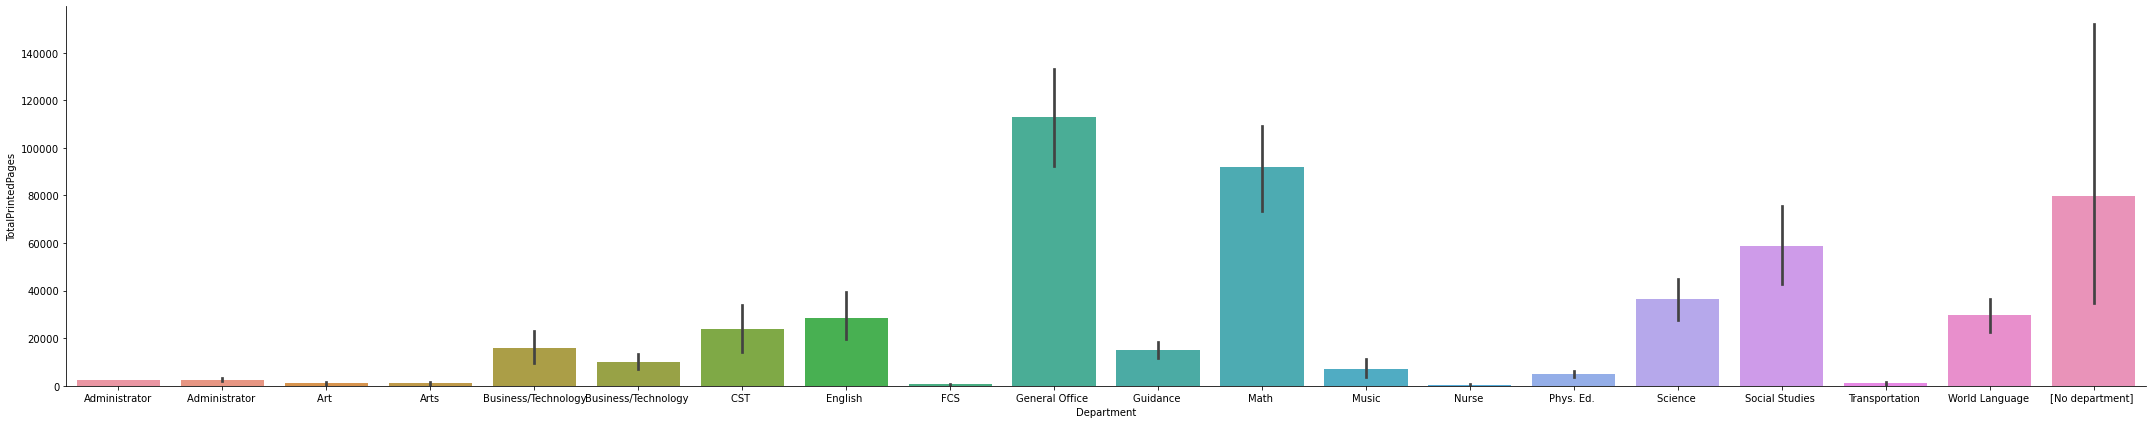

In [10]:
sns.catplot(x = "Department", y ="TotalPrintedPages", data = paperData, kind = "bar", aspect = 5, height = 6)

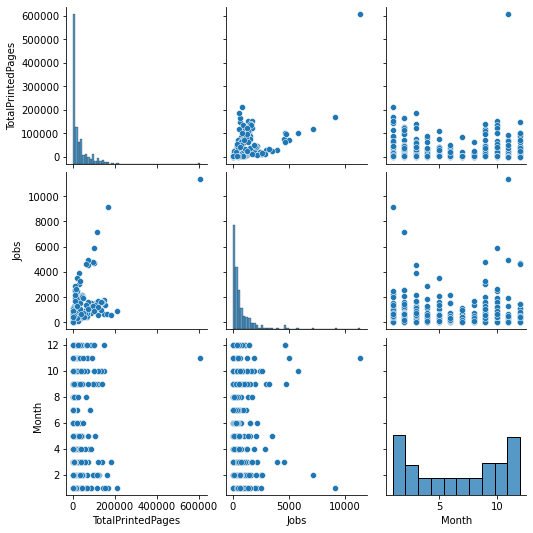

In [11]:
sns.pairplot(paperData)

In [12]:
from sklearn.model_selection import train_test_split

In [75]:
X = paperData.drop(['TotalPrintedPages', 'CostInk', 'CostPaper', 'CostTotal', 'ColorPages ', 'GrayscalePages ', 'Department'], axis = 1)

In [76]:
y = paperData['TotalPrintedPages']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rfc = RandomForestRegressor(n_estimators = 900)

In [80]:
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=900)

In [81]:
rfc_pred = rfc.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, rfc_pred)**.5) #200-42539.4, 300-40415.75, 400-39515

39689.8212998106


In [91]:
rfc.predict([[70,11]])

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1304.74333333])